<a href="https://colab.research.google.com/github/Obura98/Credit-Scoring-Models-in-Banking/blob/main/Copy_of_Practice_Notebook_Credit_Scoring_Models_for_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Scoring Models in  Banking

## Logistic Regression 

### Example

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Create a logistic regression model given a dataset with the following variables.


Below is the glossary for the given dataset:
*   Age (numeric) 
*   Sex (text: male, female)
*   Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
*   Housing (text: own, rent, or free)
*   Saving accounts (text - little, moderate, quite rich, rich)
*   Checking account (numeric, in DM - Deutsch Mark)
*   Credit amount (numeric, in DM)
*   Duration (numeric, in month)
*   Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
*   Risk (Value target - Good or Bad Risk)



#### Importing Required Libraries

We will first import the python libraries that we will need for performing our analysis.

In [ ]:
# Importing standard libraries
import pandas as pd               # library for data manipulation and analysis
import numpy as np                # library for performin scientific computations
import matplotlib.pyplot as plt   # library for creating basic visualisations
import seaborn as sns             # library for creating rich data visualisations

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas_profiling import ProfileReport


#### Loading Our Dataset

In [ ]:
# Importing Dataset for the given URL
# ---
# Dataset URL = https://bit.ly/35AyjFR
# ---
#

# reading our dataset from a URL and storing contents in a dataframe (tabular datastructure)
df = pd.read_csv('https://bit.ly/35AyjFR')

# previewing the dataframe
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Data Exploration

In [ ]:
# determining the shape of the dataset / by shape we mean size
df.shape

(1000, 11)

**Observation:** Our dataset contains 1000 records, 10 variables.

In [ ]:
# generating a statistical summary of numerical variables
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


**Observation:** We can see that we not have any missing values since all variables have the same no. of count.

In [ ]:
# checking the data types: Object = string, int64 = integers
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [ ]:
# dropping 'Unnamed: 0' variable: 
df = df.drop(columns = ['Unnamed: 0'])

We drop this variable because it has no meaning.

In [ ]:
# getting the unique values of each variable
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: Age
Number of unique values: 53
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]

Variable: Sex
Number of unique values: 2
['male' 'female']

Variable: Job
Number of unique values: 4
[2 1 3 0]

Variable: Housing
Number of unique values: 3
['own' 'free' 'rent']

Variable: Saving accounts
Number of unique values: 4
[nan 'little' 'quite rich' 'rich' 'moderate']

Variable: Checking account
Number of unique values: 3
['little' 'moderate' nan 'rich']

Variable: Credit amount
Number of unique values: 921
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  

**Observation:** This gives us a sense of which unique values exists within our variables. We can see that the savings account variable has a nan unique value. This is a hint that we have missing values.

In [ ]:
# check for missing values
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

**Observation:** It seems that we have lots of missing values in the Savings accounts and Checking account variables. From the dataset, we can infer that the missing values are as a result of having persons who took credit from the bank but didn't have a savings accounts or checking account. Thus, we will save these missing values as "NoSavingAccount" and "NoCheckingAccount".

In [ ]:
# dealing with missing values
df["Saving accounts"].fillna('NoSavingAcc', inplace= True)
df["Checking account"].fillna('NoCheckAcc', inplace= True)

In [ ]:
# check for missing values
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

**Observation:** We have no missing values. 

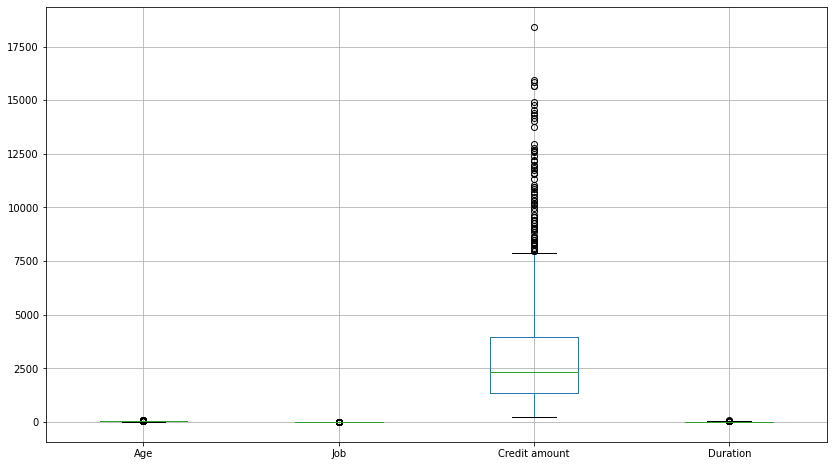

In [ ]:
# checking for outliers
plt.figure(figsize = (14, 8))
df.boxplot()
plt.show()

**Observation:** We see that the credit amount variable has outliers. This would be problematic when using a classification technique like logistic regression which assume that there are no outliers in the data. However, we will not remove these outliers as this data can be genuine.

In [ ]:
# standardizing variable names for readability
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

 We will no perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.

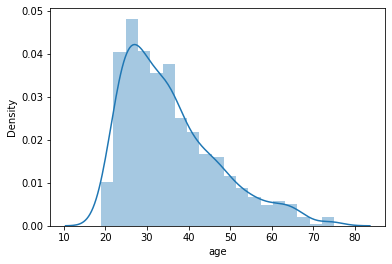

In [ ]:
# univariate analysis: age variable
sns.distplot(df.age);

**Observation:** The 'age' variable is not normally distributed. It is skewed to the right.

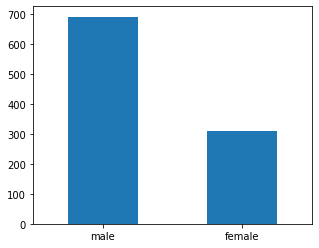

In [ ]:
# univariate analysis: sex variable
plt.figure(figsize = (5, 4))
df.sex.value_counts().plot(kind = 'bar', rot = 0);

**Observation:** There are more male records in our dataset than female records. 

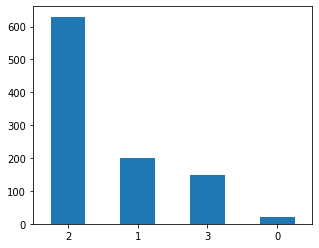

In [ ]:
# univariate analysis: job variable
plt.figure(figsize = (5, 4))
df.job.value_counts().plot(kind = 'bar', rot = 0);

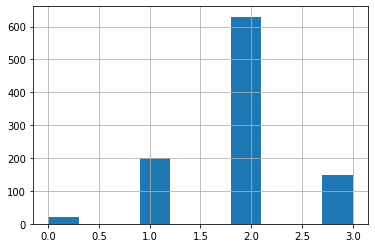

In [ ]:
df["job"].hist()

**Your observation?**

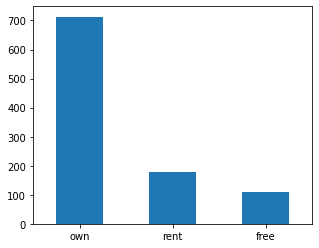

In [ ]:
# univariate analysis: housing variable
plt.figure(figsize = (5, 4))
df.housing.value_counts().plot(kind = 'bar', rot = 0);

**Your observation?**

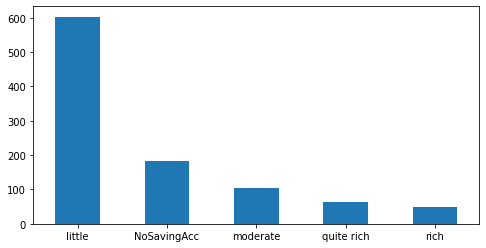

In [ ]:
# univariate analysis: checking_account variable
plt.figure(figsize = (8, 4))
df.saving_accounts.value_counts().plot(kind = 'bar', rot = 0);

**Your observation?**

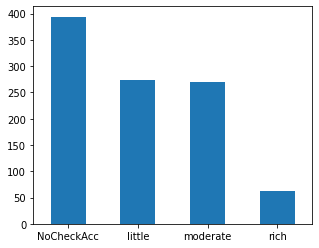

In [ ]:
# univariate analysis: checking_account variable
plt.figure(figsize = (5, 4))
df.checking_account.value_counts().plot(kind = 'bar', rot = 0);

**Your observation?**

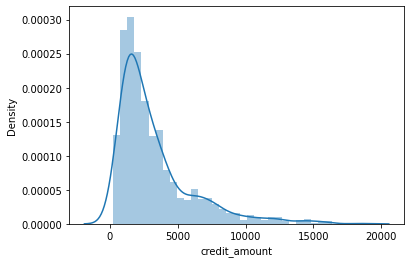

In [ ]:
# univariate analysis: credit_amount variable
sns.distplot(df.credit_amount);

**Your observation?**

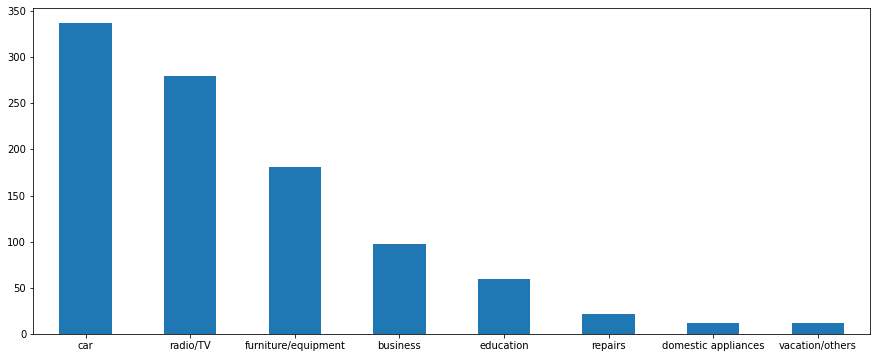

In [ ]:
# univariate analysis: purpose variable
plt.figure(figsize = (15, 6))
df.purpose.value_counts().plot(kind = 'bar', rot = 0);

**Your observation?**

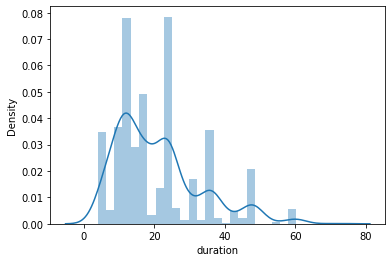

In [ ]:
# univariate analysis: duration variable
sns.distplot(df.duration); 

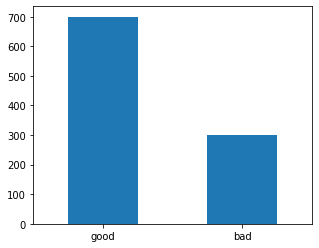

In [ ]:
# univariate analysis: purpose variable
plt.figure(figsize = (5, 4))
df.risk.value_counts().plot(kind = 'bar', rot = 0);

We now perform bivariate analysis, which is a type of analysis that involves two variables. The main objective is to understand the relationships between these two types of variables.

We will look at the relationship between our target variable 'risk' and the other variables.

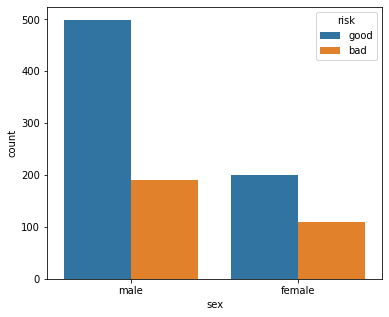

In [ ]:
# bivariate analysis: risk by sex variables
plt.figure(figsize = (6, 5))
sns.countplot('sex', hue = 'risk', data = df);

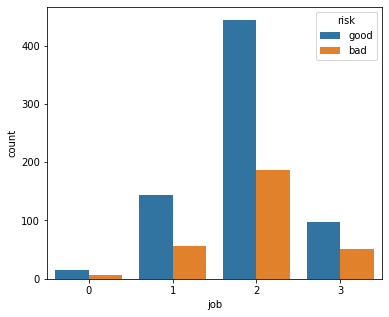

In [ ]:
# risk by job variables
plt.figure(figsize = (6, 5))
sns.countplot('job', hue = 'risk', data = df);

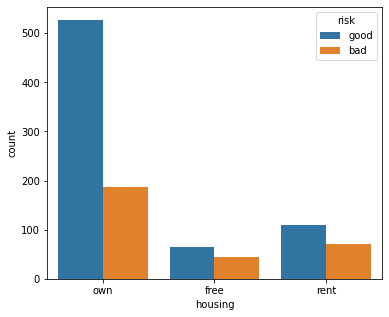

In [ ]:
# risk by housing variables
plt.figure(figsize = (6, 5))
sns.countplot('housing', hue = 'risk', data = df);

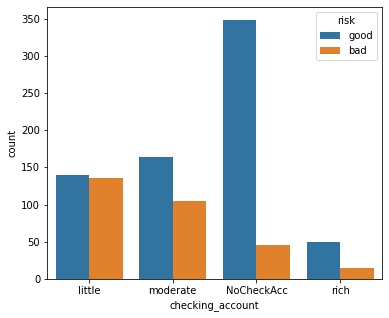

In [ ]:
# risk by checking_account variables
plt.figure(figsize = (6, 5))
sns.countplot('checking_account', hue = 'risk', data = df);

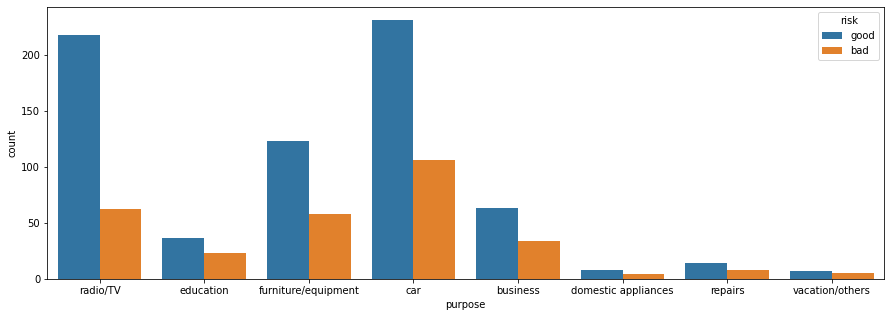

In [ ]:
# risk by purpose variables
plt.figure(figsize = (15, 5))
sns.countplot('purpose', hue = 'risk', data = df);

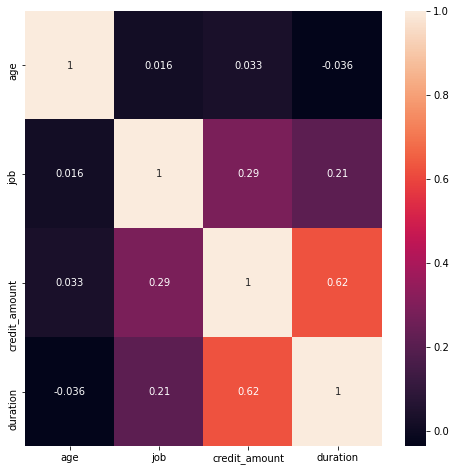

In [ ]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot=True, );

**Observation:** The variables duration and credit amount are strongly correlated. 

In [ ]:
male = df[df['Sex'] == "male"]
female = df[df['Sex'] == "female"]

male[df['Risk'] == "good"].shape[0] / male.shape[0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0.7231884057971014

In [ ]:
female[df['Risk'] == "good"].shape[0] / female.shape[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.6483870967741936

#### Data Preparation

In order to work with our target variable, which is the risk variable, we will binarize our risk variable. Labels are as follows: 0: Bad 1: Good. 

In [ ]:
# LabelBinarizer converts the string categorical variable to binary 
from sklearn.preprocessing import LabelBinarizer
lb= LabelBinarizer()
df["risk"]= lb.fit_transform(df["risk"])

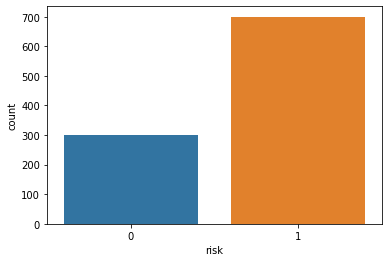

In [ ]:
# plotting risk distribution to understand whether there are more records 
# with more categories than the other.
sns.countplot('risk', data = df);

**Observation:** We note that our dataset is highly inbalanced. We need to make sure that our dataset is balanced which means, we need to have the same no. of records with the 0 and 1 class. We will address this issue later.

For now, in order to prepare our dataset for our model, we will perform binning on the numerical variables i.e. duration, age and credit amount variables. Once we perform binning, we will later perform one hot encoding to all the categorical variables within our dataset.

In [ ]:
# performing binning on duration 
# we bin by specifying 6 bins
df["duration"] = pd.qcut(df.duration, q = 6)

In [ ]:
# performing binning on age
# we bin by defining the intervals and categories
interval = (18, 25, 35, 60, 120)
categories = ['student', 'youth', 'adult', 'senior']
df["age"] = pd.cut(df.age, interval, labels = categories)

In [ ]:
# performing binning on credit_amount
# this time we bin without specifying i.e. we create 6 bins
df["credit_amount"] = pd.qcut(df.credit_amount, q = 5)

We will now transform our features into dummy variables by one-hot encoding the features in our dataset. This will make our features robust for our linear regression model.

In [ ]:
# performing one hot encoding to the purpose variable
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)


In [ ]:
# performing one hot encoding to the purpose variable
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)


In [ ]:
# performing one hot encoding to the sex variable
df = df.merge(pd.get_dummies(df.sex, drop_first=True, prefix='sex'), left_index=True, right_index=True)


In [ ]:
# performing one hot encoding to the housing variable
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)


In [ ]:
# performing one hot encoding to the savings account variable
df = df.merge(pd.get_dummies(df.saving_accounts, drop_first=True, prefix='savings'), left_index=True, right_index=True)


In [ ]:
# performing one hot encoding to checking account variable
df = df.merge(pd.get_dummies(df.checking_account, drop_first=True, prefix='check'), left_index=True, right_index=True)


In [ ]:
# performing one hot encoding to age variable
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)

In [ ]:
# performing one hot encoding to age variable
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)

In [ ]:
# performing one hot encoding to credit amount variable
df = df.merge(pd.get_dummies(df.credit_amount, drop_first=True, prefix='credit_amount'), left_index=True, right_index=True)

In [ ]:
# previewing our created dataframe
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,job_1,job_2,job_3,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,sex_male,housing_own,housing_rent,savings_little,savings_moderate,savings_quite rich,savings_rich,check_little,check_moderate,check_rich,age_youth,age_adult,age_senior,"duration_(10.0, 12.0]","duration_(12.0, 18.0]","duration_(18.0, 24.0]","duration_(24.0, 36.0]","duration_(36.0, 72.0]","credit_amount_(1262.0, 1906.8]","credit_amount_(1906.8, 2852.4]","credit_amount_(2852.4, 4720.0]","credit_amount_(4720.0, 18424.0]"
0,senior,male,2,own,NoSavingAcc,little,"(249.999, 1262.0]","(3.999, 10.0]",radio/TV,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,student,female,2,own,little,moderate,"(4720.0, 18424.0]","(36.0, 72.0]",radio/TV,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,adult,male,1,own,little,NoCheckAcc,"(1906.8, 2852.4]","(10.0, 12.0]",education,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,adult,male,2,free,little,little,"(4720.0, 18424.0]","(36.0, 72.0]",furniture/equipment,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,adult,male,2,free,little,little,"(4720.0, 18424.0]","(18.0, 24.0]",car,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
# we then cxcluding the missing columns since we have new variables for use
del df["job"]
del df["purpose"]
del df["sex"]
del df["housing"]
del df["saving_accounts"]
del df["checking_account"]
del df["age"]
del df["duration"]
del df["credit_amount"]

In [ ]:
# preview updated dataframe
df.head()

,risk,job_1,job_2,job_3,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others,sex_male,housing_own,housing_rent,savings_little,savings_moderate,savings_quite rich,savings_rich,check_little,check_moderate,check_rich,age_youth,age_adult,age_senior,"duration_(10.0, 12.0]","duration_(12.0, 18.0]","duration_(18.0, 24.0]","duration_(24.0, 36.0]","duration_(36.0, 72.0]","credit_amount_(1262.0, 1906.8]","credit_amount_(1906.8, 2852.4]","credit_amount_(2852.4, 4720.0]","credit_amount_(4720.0, 18424.0]"
0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
# dividing our dataset into features (X) and target (y)
X = df.drop(columns = ['risk']).values
y = df['risk'].values

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


In [ ]:
# splitting our dataset into 80-20 train-test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Because we had earlier seen that we had an imbalanced dataset, we will create a balanced dataset by trying to resample our dataset using SMOTE (Synthetic minority Oversampling Technique). This technique works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# creating a balanced dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [ ]:
# we check the amount of records in each category
np.bincount(y_train)

array([560, 560])

**Observation:** The minority class has been increased to the total number of majority class.

#### Data Modeling

In [ ]:
# model creation
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()

# training our model
logistic_classifier.fit(X_train, y_train)

# making predictions
y_pred_logistic = logistic_classifier.predict(X_test)

#### Model Evaluation

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_pred_logistic, y_test))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

0.695
[[ 26  34]
 [ 27 113]]
              precision    recall  f1-score   support

           0       0.49      0.43      0.46        60
           1       0.77      0.81      0.79       140

    accuracy                           0.69       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.69      0.69      0.69       200



**Observations:**

Our accuracy score for this model was 0.73. 

From our confusion matrix, we can see that we 119 records with the class 1 were predicted correctly, however 32 records with the class 1 were incorrectly predicted. 28 records with the class 0 were predicted correctly while 21 records were predicted incorrectly.

From our classification report, we can see that we have a recall of 0.66 which is our true positive rate i.e. When it's actually a 1, how often does it predict a 1?

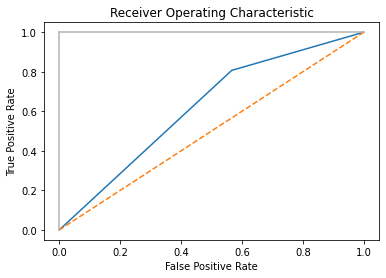

In [ ]:
# Exploring another metric below 
# ---
# plotting roc curve (receiving operating characteristic curve)
from sklearn.metrics import roc_curve, roc_auc_score

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_logistic)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This type of curve shows the true positive and false positive rate for every probability threshold of a binary classifier. The higher the blue line, the better the model at distinguishing between the positive and negative classes.

In [ ]:
# roc_auc_score
roc_auc_score(y_test, y_pred_logistic)

0.6202380952380953

Observation: An roc auc score coser to 1 the better the model is.

### <font color="green">Challenge 1</font>

In [ ]:
# Create a credit scoring model that will be used to predict 
# whether a customer will default or not.
# ---
# Dataset URL = https://bit.ly/37FPsAF
# ---
# YOUR CODE GOES BELOW
#

## Advanced Machine Learning Techniques

For the following examples, we will apply other advanced machine learning techniques i.e. decision trees, random forest, gradient boosting and neural networks. We will dive right into the modeling stage since we will be using the dataset that we have already explored.

### Example: Decision Trees, Random Forest and Gradient Boosting.

In [ ]:
# importing our machine learning algorithms  
from sklearn.tree import DecisionTreeClassifier    
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# instantiating our algorithms
decision_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
gbm_classifier = GradientBoostingClassifier()

# training our models
decision_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)

# making predictions
decision_y_prediction = decision_classifier.predict(X_test) 
random_forest_y_pred = random_forest_classifier.predict(X_test)
gbm_y_pred = gbm_classifier.predict(X_test)

# evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
print('Decision Tree')
print(accuracy_score(decision_y_prediction, y_test))
print(confusion_matrix(decision_y_prediction, y_test))
print(classification_report(decision_y_prediction, y_test))
print(roc_auc_score(decision_y_prediction, y_test))

print('Random Forest')
print(accuracy_score(random_forest_y_pred, y_test))
print(confusion_matrix(random_forest_y_pred, y_test))
print(classification_report(random_forest_y_pred, y_test))
print(roc_auc_score(random_forest_y_pred, y_test))

print('Gradient Boosting')
print(accuracy_score(gbm_y_pred, y_test))
print(confusion_matrix(gbm_y_pred, y_test))
print(classification_report(gbm_y_pred, y_test))
print(roc_auc_score(gbm_y_pred, y_test))

Decision Tree
0.715
[[ 34  31]
 [ 26 109]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        65
           1       0.78      0.81      0.79       135

    accuracy                           0.71       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.71      0.71      0.71       200

0.6652421652421652
Random Forest
0.71
[[ 22  20]
 [ 38 120]]
              precision    recall  f1-score   support

           0       0.37      0.52      0.43        42
           1       0.86      0.76      0.81       158

    accuracy                           0.71       200
   macro avg       0.61      0.64      0.62       200
weighted avg       0.75      0.71      0.73       200

0.6416515973477999
Gradient Boosting
0.695
[[ 23  24]
 [ 37 116]]
              precision    recall  f1-score   support

           0       0.38      0.49      0.43        47
           1       0.83      0.76      0.79       153

    accuracy

**Observation:** The Recall score for the random forest model was slightly higher than that of the logistic regression model. However, the random forest model was not better at predicting true negatives. 

Overall, we can still retain to use the logistic regression classifier, as it still outperformed other models even without any optimisation done.

### Example: Neural Networks

In [ ]:
# importing libraries
import keras
from keras.models import Sequential     # Used to initialize the Artificial Neural Network
from keras.layers import Dense          # Used to build the hidden Layers
from keras.layers import Dropout        # Used to prevent overfitting

# creating an instance 
classifier = Sequential() 

# adding hidden layers
classifier.add(Dense(units = 100, input_dim = 32, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 100, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))

# output layer
classifier.add(Dense(units = 1, activation = "sigmoid"))

# compiling our model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training our model
classifier.fit(X_train, y_train, epochs = 500, batch_size = 32)

Epoch 1/500
35/35 [==============================] - 0s 1ms/step - loss: 0.8967 - accuracy: 0.4786
Epoch 2/500
35/35 [==============================] - 0s 1ms/step - loss: 0.5454 - accuracy: 0.5786
Epoch 3/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7214
Epoch 4/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7482
Epoch 5/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7589
Epoch 6/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7679
Epoch 7/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.7848
Epoch 8/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7750
Epoch 9/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.7884
Epoch 10/500
35/35 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8116
Epoch 11/

In [ ]:
# model evaluation
loss, accuracy = classifier.evaluate(X_test, y_test)
print('ANN Accuracy:', accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 1.8962 - accuracy: 0.6800
ANN Accuracy: 0.6800000071525574


We get an accuracy of 0.69 with our neural networks model. However, this is not better than our logistic regression accuracy score.

### <font color="green">Challenge</font>

In [ ]:
# Given the dataset in challenge 1, create a credit scoring model
# to predict whether a customer will default or not using any of the
# advanced machine learning techniques.
# ---
# Dataset URL = https://bit.ly/37FPsAF
# ---
# YOUR CODE GOES BELOW
#